# Age and selfconciousness in chimpanzees and bonobos

In [27]:
pan.data<-read.csv("pan age conciousness.csv")
str(pan.data)

'data.frame':	76 obs. of  5 variables:
 $ Id           : chr  "" "" "" "" ...
 $ species      : chr  "Pan paniscus" "Pan troglodytes" "Pan paniscus" "Pan paniscus" ...
 $ age          : int  7 8 10 10 12 13 14 15 16 25 ...
 $ sex          : chr  "male" "male" "female" "female" ...
 $ concioussness: int  0 0 0 0 0 0 0 0 0 0 ...


In [28]:
library(dplyr)
library(ggplot2)
library(gridExtra)

In [29]:
p.troglodytes<-pan.data%>%
filter(species=="Pan troglodytes")
p.paniscus<-pan.data%>%
filter(species=="Pan paniscus")

In [30]:
C<-data_space <- ggplot(aes(x=age,y=concioussness),data=p.troglodytes) + 
  geom_point(size=3,aes(color = as.factor(concioussness))) +
  geom_smooth(
    method = "glm",
    method.args = list(family = "binomial"),
    se = T
  )+theme_bw()+ theme(legend.position = "none")   +
ggtitle("chimpanzees") +
labs(x="age(months)",y="probability of selfconciousness")

In [31]:
D<-data_space <- ggplot(aes(x=age,y=concioussness),data=p.paniscus) + 
  geom_point(size=3,aes(color = as.factor(concioussness))) +
  geom_smooth(
    method = "glm",
    method.args = list(family = "binomial"),
    se = T
  )+theme_bw()+ theme(legend.position = "none")   +
ggtitle("bonobos") +
labs(x="age(months)",y="probability of selfconciousness")

In [44]:
E<-data_space <- ggplot(aes(x=age,y=concioussness),data=pan.data) + 
  geom_point(size=3,aes(color = as.factor(concioussness))) +
  geom_smooth(
    method = "glm",
    method.args = list(family = "binomial"),
    se = T
  )+theme_bw()+ theme(legend.position = "none")   +
ggtitle("both Pan species together") +
labs(x="age(months)",y="probability of selfconciousness")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



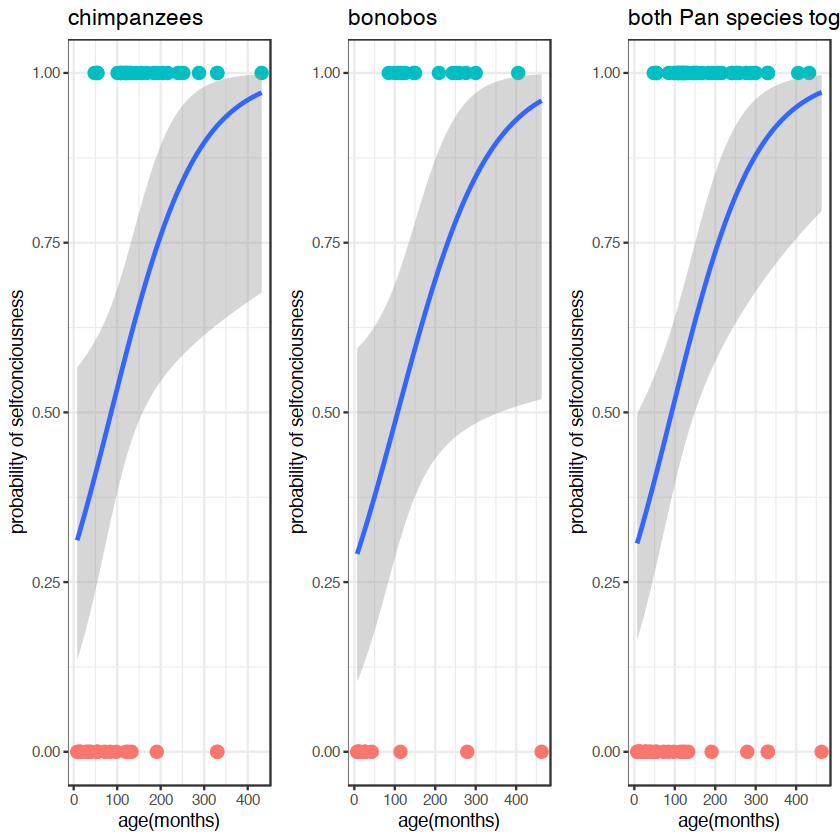

In [45]:
grid.arrange(C,D,E,ncol=3)

`geom_smooth()` using formula 'y ~ x'



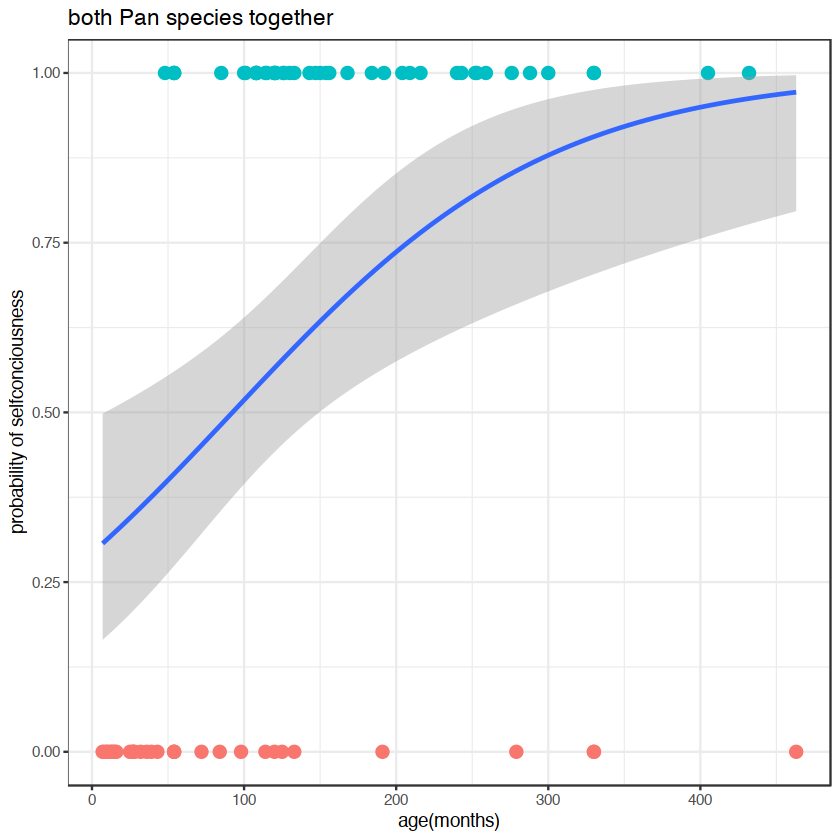

In [46]:
E

In [40]:
# model
model.chimp<-glm(concioussness~age, data = p.troglodytes, family = binomial)
summary(model.chimp)
model.bon<-glm(concioussness~age, data = p.paniscus, family = binomial)
summary(model.bon)
model.both<-glm(concioussness~age, data = pan.data, family = binomial)
summary(model.both)


Call:
glm(formula = concioussness ~ age, family = binomial, data = p.troglodytes)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2606  -0.9822   0.5839   1.0111   1.3455  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.873919   0.568910  -1.536    0.125  
age          0.010146   0.004289   2.365    0.018 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.266  on 48  degrees of freedom
Residual deviance: 58.529  on 47  degrees of freedom
AIC: 62.529

Number of Fisher Scoring iterations: 4



Call:
glm(formula = concioussness ~ age, family = binomial, data = p.paniscus)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5307  -0.8698   0.5757   1.0256   1.2616  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.950524   0.671593  -1.415   0.1570  
age          0.008879   0.004382   2.026   0.0427 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37.096  on 26  degrees of freedom
Residual deviance: 31.496  on 25  degrees of freedom
AIC: 35.496

Number of Fisher Scoring iterations: 4



Call:
glm(formula = concioussness ~ age, family = binomial, data = pan.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6703  -0.9336   0.5509   1.0331   1.3617  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.881449   0.429124  -2.054  0.03997 * 
age          0.009542   0.003079   3.099  0.00194 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.456  on 75  degrees of freedom
Residual deviance:  90.238  on 74  degrees of freedom
AIC: 94.238

Number of Fisher Scoring iterations: 4


In [42]:
#just a model
coef(model.both)# identify the model coefficients.
confint(model.both)
exp(coef(model.both))# find odds ratio, prob
exp(confint(model.both))# calculates confidence interval for odds ratio.

(Intercept)          age 
-0.881449183  0.009542047

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-1.76636751,-0.06850197
age,0.00405094,0.01624529


(Intercept)         age 
  0.4141823   1.0095877

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.1709528,0.9337916
age,1.0040592,1.0163780


<https://stats.idre.ucla.edu/r/dae/logit-regression/>

In [56]:
library(broom)
output.model<-augment(model.both)
output.model$prob<-exp(output.model$.fitted)
head(output.model)

concioussness,age,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd,prob
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,7,-0.8146549,-0.8562479,-0.8721308,0.03609153,1.107122,0.008600103,0.4427921
0,8,-0.8051128,-0.8596724,-0.8754859,0.03579879,1.107085,0.008606905,0.4470375
0,10,-0.7860287,-0.8665484,-0.8822206,0.03521351,1.107012,0.008618844,0.4556507
0,10,-0.7860287,-0.8665484,-0.8822206,0.03521351,1.107012,0.008618844,0.4556507
0,12,-0.7669446,-0.8734598,-0.8889878,0.03462889,1.106938,0.008628596,0.4644299
0,13,-0.7574026,-0.8769288,-0.8923835,0.03433697,1.106901,0.008632667,0.4688827


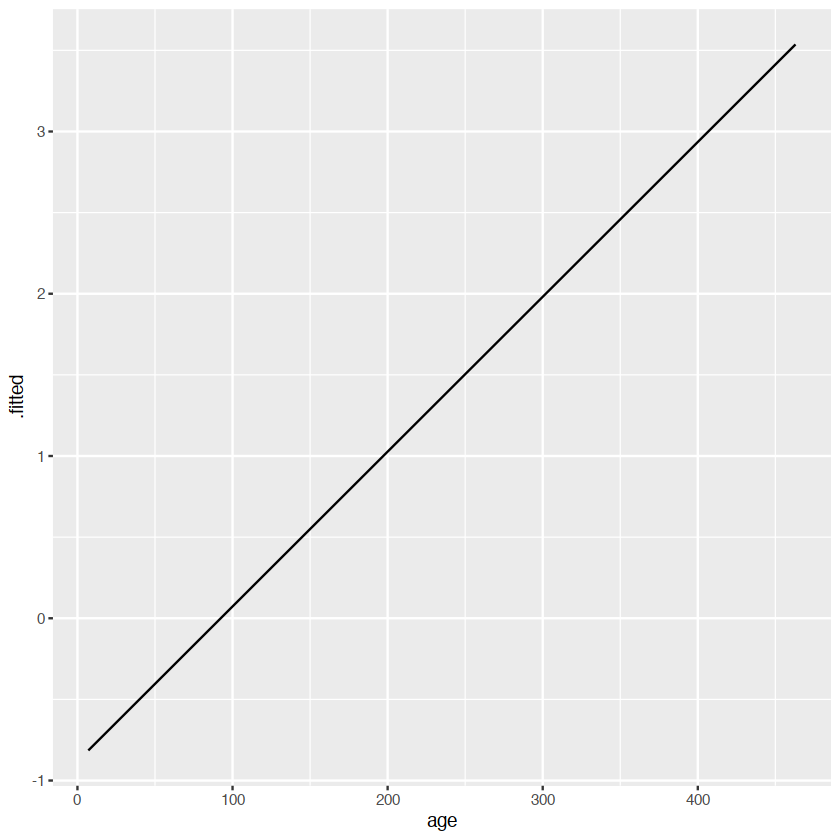

In [58]:
ggplot(data=output.model,aes(age,.fitted))+geom_line()

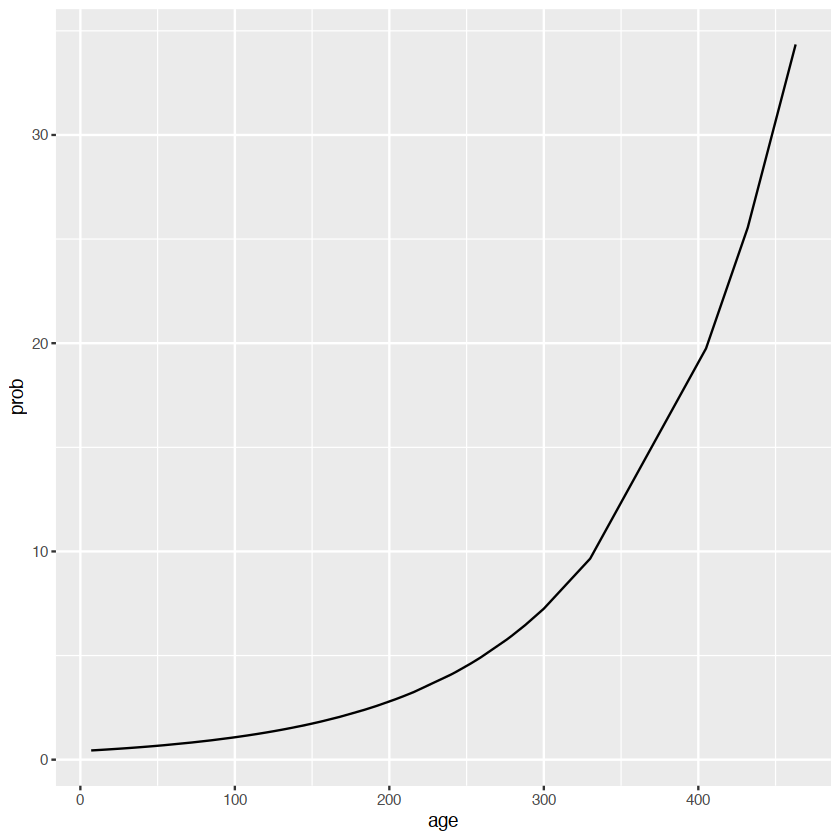

In [59]:
ggplot(data=output.model,aes(age,prob))+geom_line()